**importing the modules**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

**import the multiple files**

In [2]:
df1=pd.read_csv('/content/Colleges.csv',header=0) #p
df=pd.read_csv('/content/ML case Study.csv',header=0)
df3=pd.read_csv('/content/cities.csv',header=0)

In [3]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09


**Tier 1 ,Tier 2 and Tier 3 converting to list**

In [4]:
tier1=df1['Tier 1'].dropna().tolist()
tier2=df1['Tier 2'].dropna().tolist()
tier3=df1['Tier 3'].dropna().tolist()

**converting metrio and non-metro columns into list**

In [5]:
metrio=df3['Metrio City'].dropna().tolist()
non_metro=df3['non-metro cities'].dropna().tolist()

In [6]:
tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune']

In [7]:
non_metro

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer']

**metro and non metro cities convert this categorical data into numerical data such that 0 goes for non metro and 1 for metro cities**

In [8]:
for item in df.City:
  if item in metrio:
    df['City'].replace(item,1,inplace=True)
  if item in non_metro:
    df['City'].replace(item,0,inplace=True)

**Tier1,Tier2,Tier3 convert this categorical data into numerical data such that 1 ,2,3, respectivly**

In [9]:
for item in df.College:
  if item in tier1:
    df['College'].replace(item,1,inplace=True)
  if item in tier2:
    df['College'].replace(item,2,inplace=True)
  if item in tier3:
    df['College'].replace(item,3,inplace=True)

In [10]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [11]:
df.shape

(1589, 8)

**EDA(Exploratory Data Analysis)**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


**use describe function**

Get descriptive statistics for numerical columns

In [13]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


**check missing values**

In [14]:
df.isna().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [15]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


**check for outliers using seaborn**

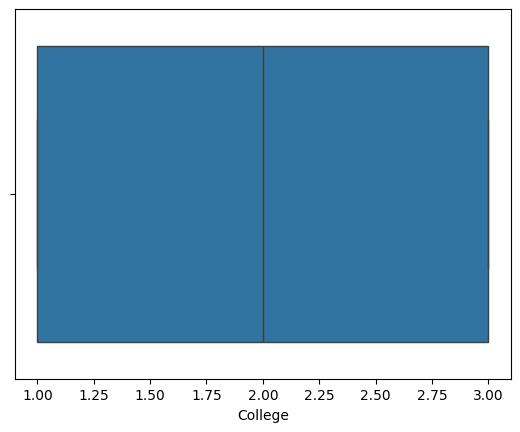

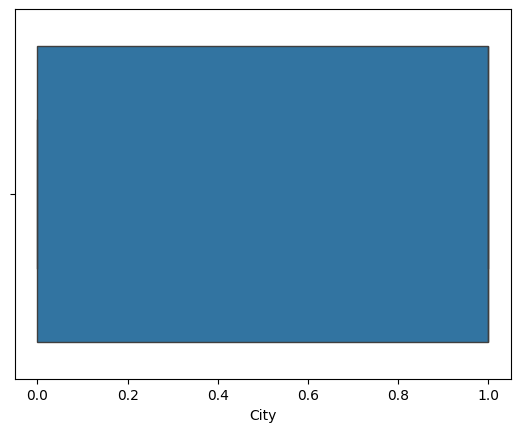

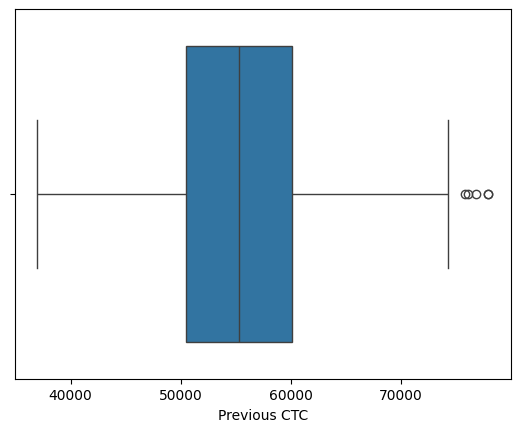

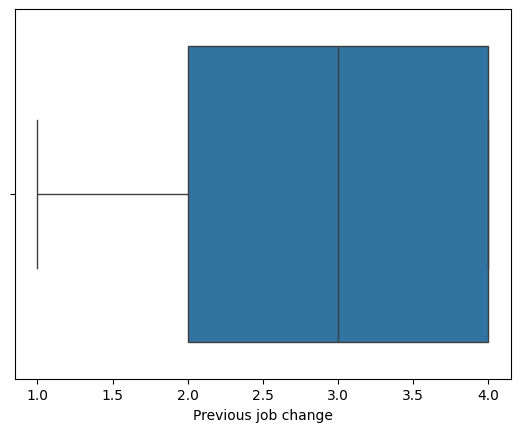

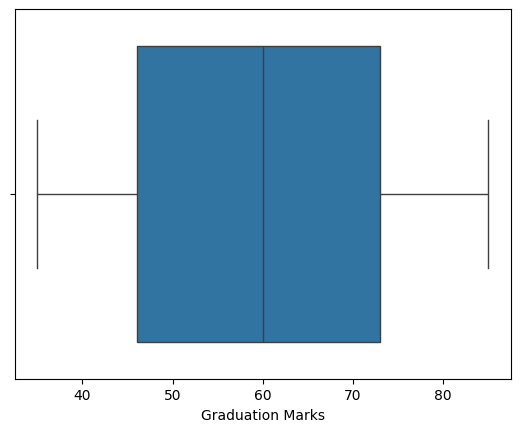

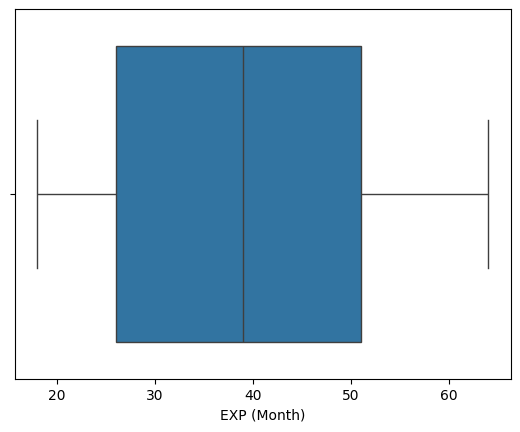

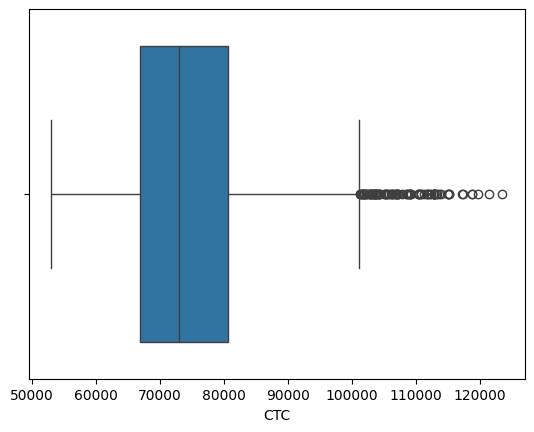

In [16]:
import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [17]:
# Identify columns with numerical data
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound, but only for numerical columns
for col in numerical_cols:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

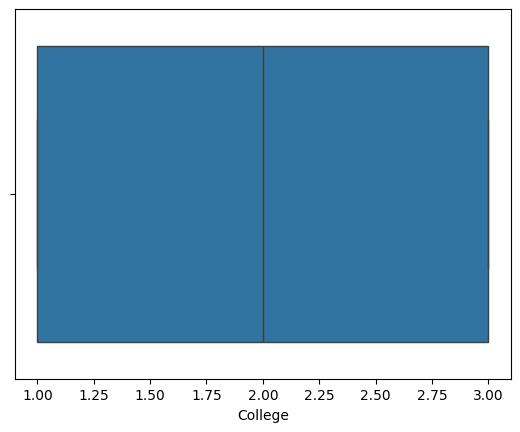

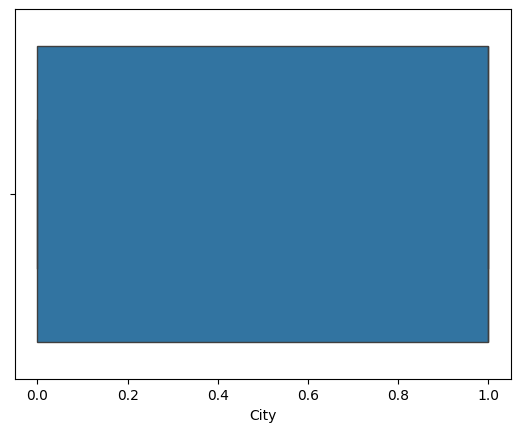

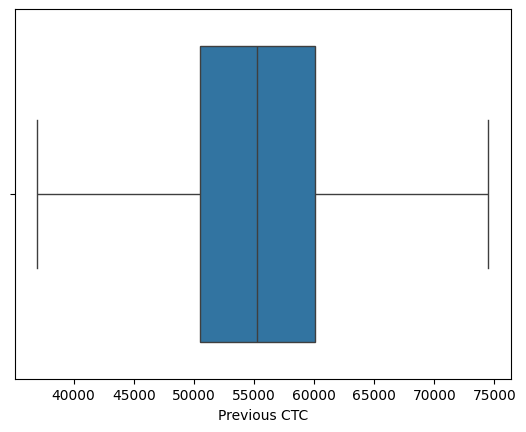

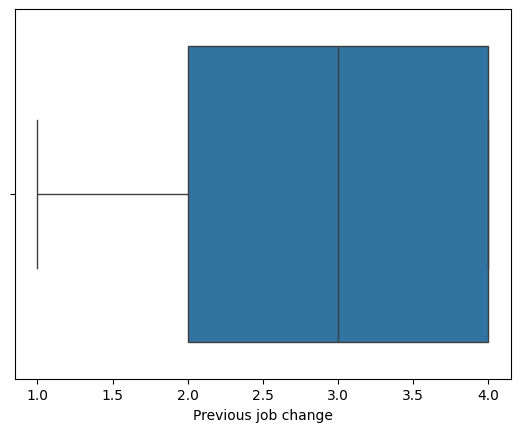

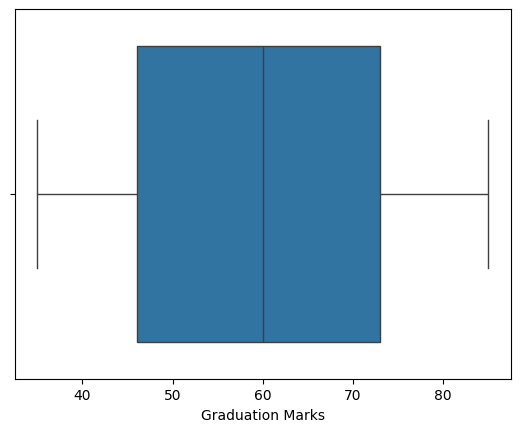

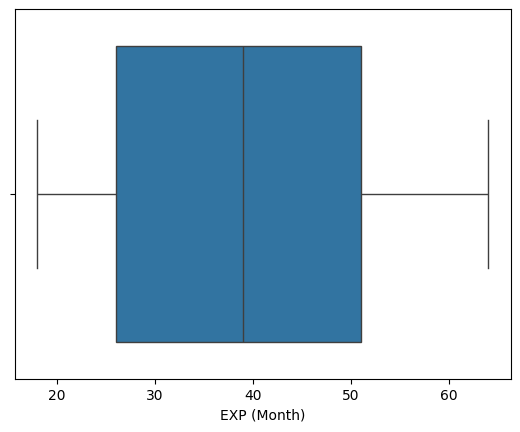

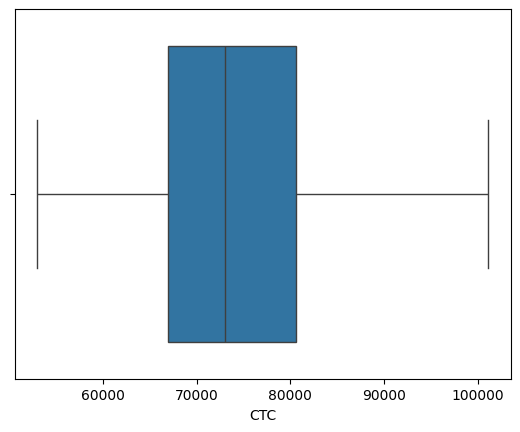

In [18]:
# Check for outliers again
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

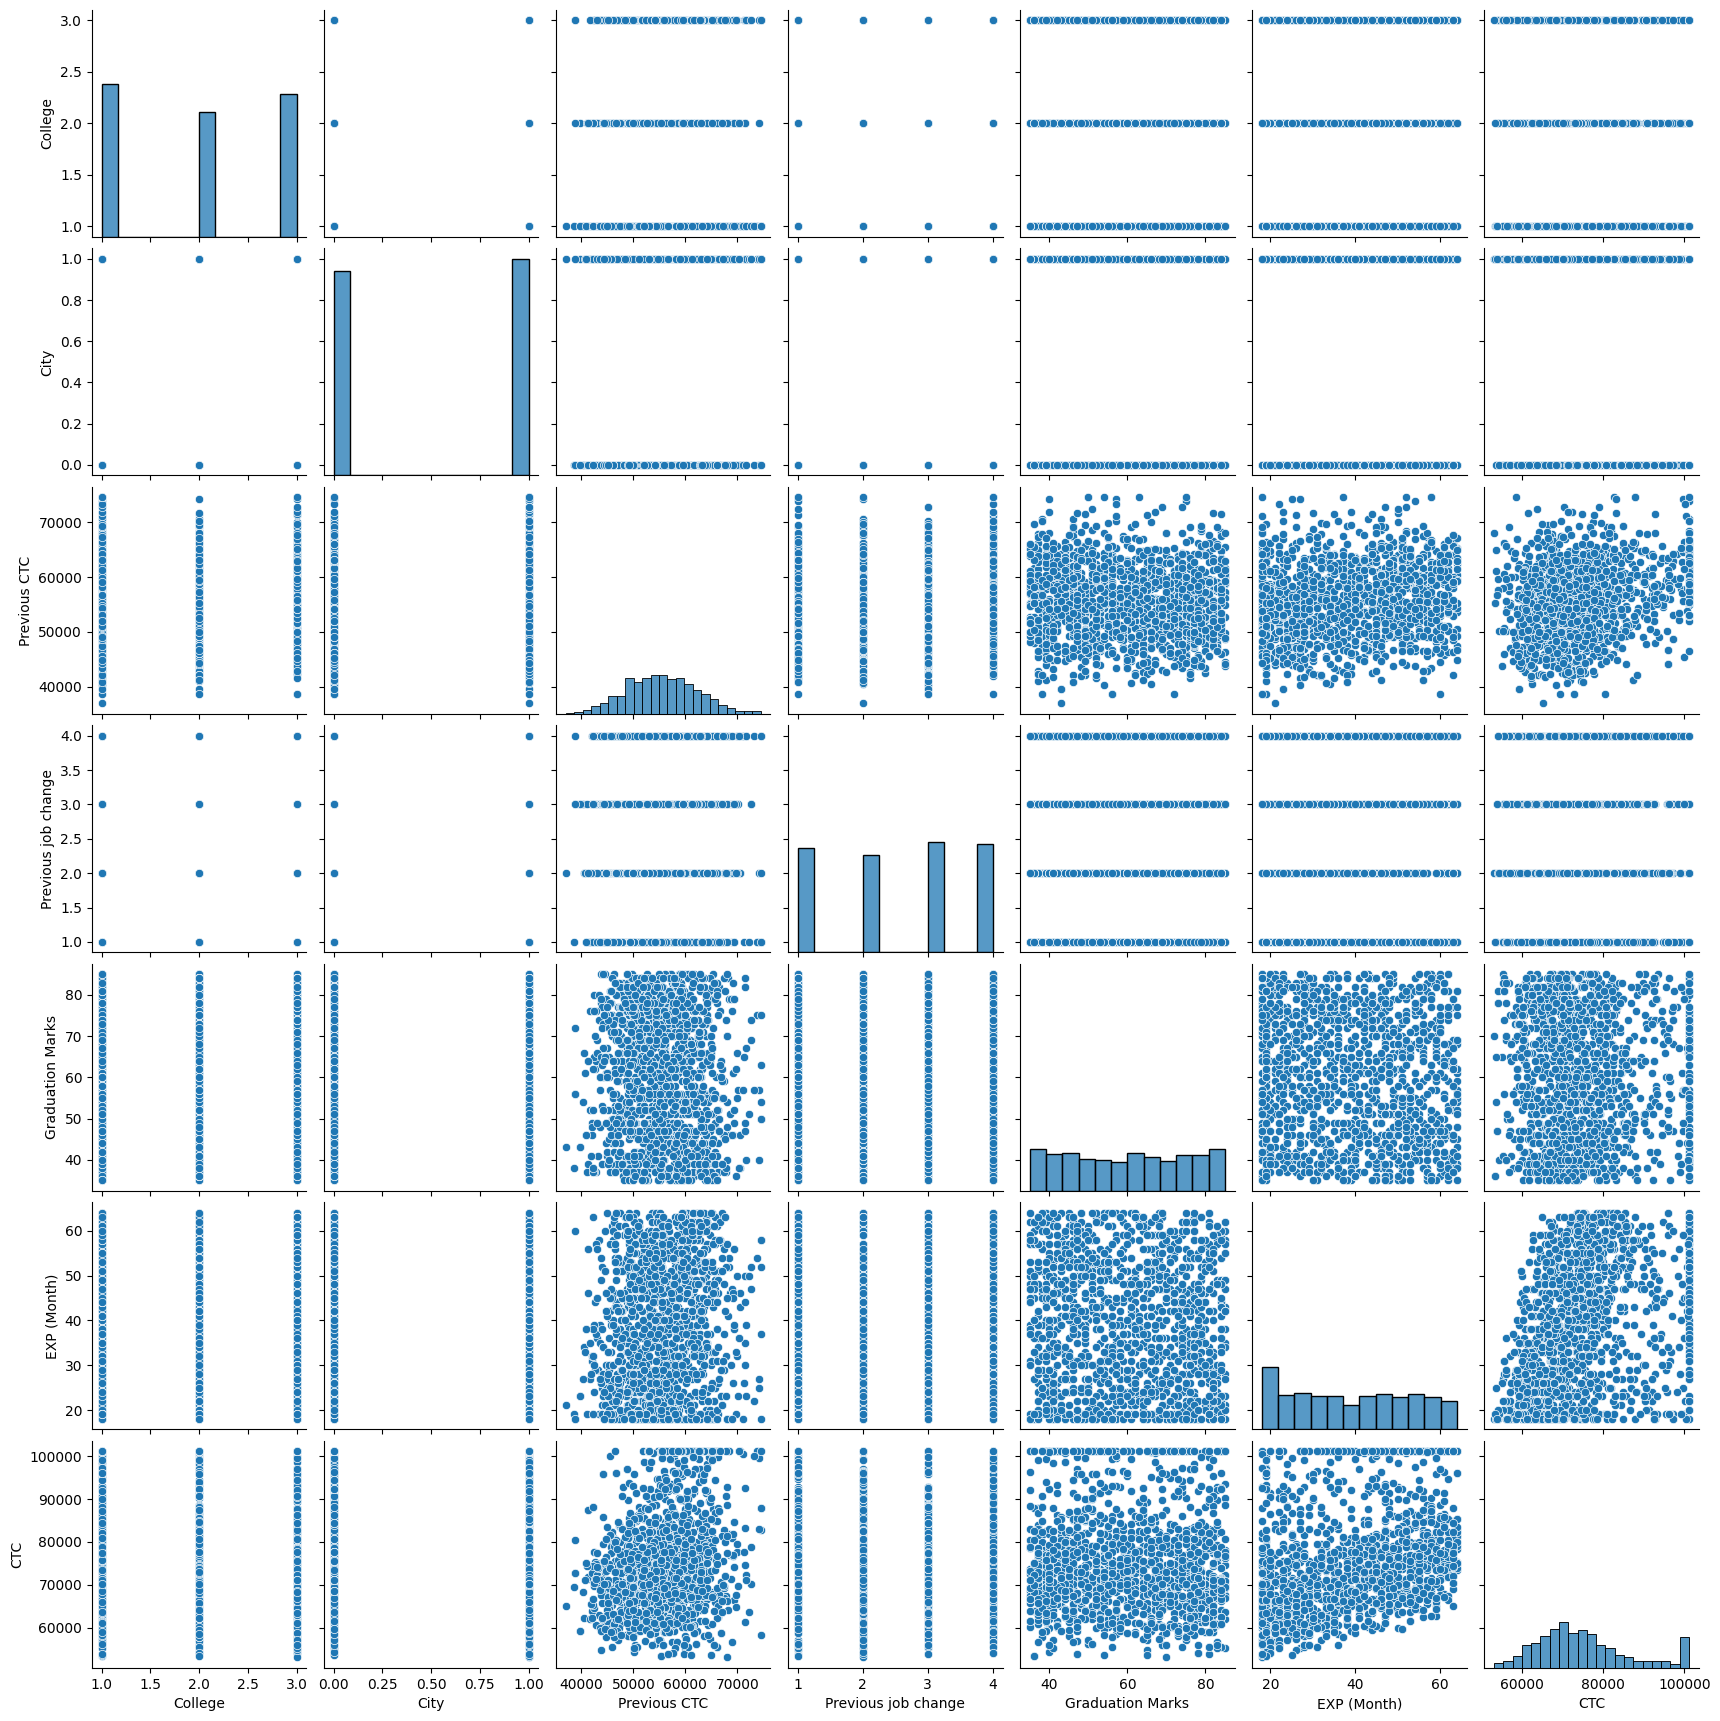

In [19]:
sns.pairplot(df)# checking the outliers through the graph

<Axes: xlabel='Role', ylabel='count'>

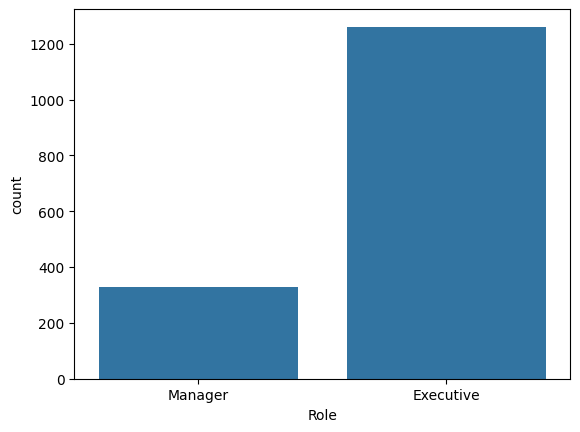

In [23]:
#drawing the graph number  of managers and Excecutive
sns.countplot(x='Role',data=df)

**Creating dummy variables for dataframe**

In [24]:
df=pd.get_dummies(df,columns=['Role'],drop_first=True,dtype=int)

**Calculate the correlation matrix**

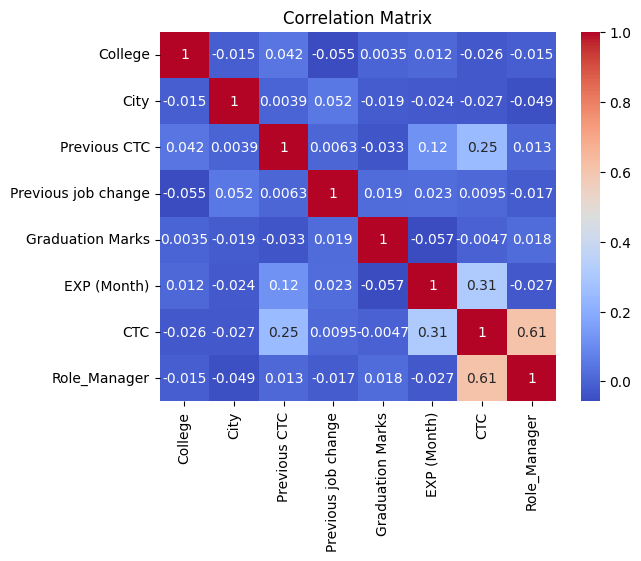

In [25]:
corr_matrix = df.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Applying the Simple Linear regression model to the data frame**

In [26]:
#importing the modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Defining the independent variable (X) and dependent variable (y)
x_slr = df[['Role_Manager']]  # Role_Manager is independent variable
y_slr = df['CTC'] # Using 'CTC' as the predictor

# Splitting the data into training and testing sets
x_trainsl, x_testsl, y_trainsl, y_testsl = train_test_split(x_slr, y_slr, test_size=0.2, random_state=42)

# Create a simple linear regression model
slr_mdl = LinearRegression()

# Train the model
slr_mdl.fit(x_trainsl, y_trainsl)


LinearRegression()

**simple linear regression model performance**

In [28]:
# Calculate R-squared and Mean Squared Error (MSE) for the model
r_squared_test = r2_score(y_testsl,slr_mdl.predict(x_testsl))
mse_test = mean_squared_error(y_testsl,slr_mdl.predict(x_testsl))

r_squared_train = r2_score(y_trainsl, slr_mdl.predict(x_trainsl))
mse_train = mean_squared_error(y_trainsl, slr_mdl.predict(x_trainsl))

print(f"R-squared for training set: {r_squared_train}")
print(f"Mean Squared Error for training set: {mse_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")

R-squared for training set: 0.3508408636499529
Mean Squared Error for training set: 82472212.51654728
R-squared for test set: 0.4428508057002314
Mean Squared Error for test set: 87371139.34200169


**results for the simple linear regression**

R-squared for test set: 0.4428508057002314

Mean Squared Error for test set: 87371139.34200169

**Applying the Multiple Linear Regression model to the data framed**

In [29]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [30]:
# Define the independent variables (X) and dependent variable (y)
x_mul =df.loc[:,df.columns!='CTC']  # Features (independent variables)
y_mul = df['CTC']  # Target variable (depedent variable)

# Adding a constant to the model (intercept)
x_mul_const = sm.add_constant(x_mul)

# Splitting the data into training and testing sets in 80:20 ratio
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_mul_const, y_mul, test_size=0.2, random_state=42)

# Create a multiple linear regression model
mlr_mdl = LinearRegression()

# Train the model
mlr_mdl.fit(x_train_r, y_train_r)

LinearRegression()

**Multiple lenear regtression model performance**

In [31]:
# Calculate R-squared and Mean Squared Error (MSE) for the model
rsquared_mlr_test = r2_score(y_test_r, mlr_mdl.predict(x_test_r))
mse_mlr_test = mean_squared_error(y_test_r, mlr_mdl.predict(x_test_r))

rsquared_mlr_train = r2_score(y_train_r, mlr_mdl.predict(x_train_r))
mse_mlr_train = mean_squared_error(y_train_r, mlr_mdl.predict(x_train_r))

print("R-square_trainingdataset",rsquared_mlr_train)
print("mse_trainingdataset",mse_mlr_train )

print("R-square_test dataset",rsquared_mlr_test)
print("mse_test dataset",mse_mlr_test)

R-square_trainingdataset 0.5026557995488168
mse_trainingdataset 63184933.08760053
R-square_test dataset 0.5790435058024448
mse_test dataset 66013643.89960206


**Results for Multiple lenear regtression**

R-squared for test set: 0.5790435058024448

Mean Squared Error for test set: 66013643.89960206

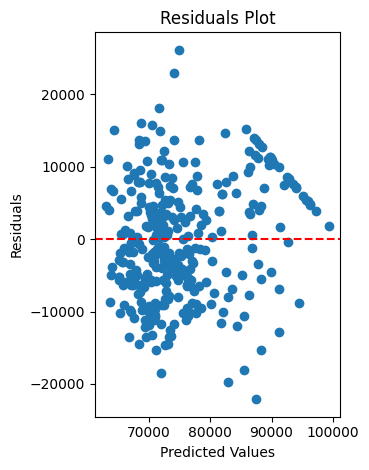

In [32]:
import matplotlib.pyplot as plt
# Plot residuals
plt.subplot(1, 2, 2)
residuals = y_test_r -(mlr_mdl.predict(x_test_r))
plt.scatter((mlr_mdl.predict(x_test_r)), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

**Ridge Regression**

In [66]:
#import all modules from sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [67]:
# Create a Ridge regression model within a pipeline that includes scaling
ridge_model = make_pipeline(StandardScaler(), Ridge(random_state=42))

# Train the Ridge regression model
ridge_model.fit(x_train_r, y_train_r)

# Predict the 'quality' on both the training and test sets using the Ridge model
y_train_pred_ridge = ridge_model.predict(x_train_r)
y_test_pred_ridge = ridge_model.predict(x_test_r)

**Ridge Regression performance**

In [68]:
# Calculate R-squared for both the training and test sets for the Ridge model
r_squared_train_ridge = r2_score(y_train_r, y_train_pred_ridge)
# Use y_test_pred_ridge (predictions on test set) to calculate MSE for training set
mse_train_r = mean_squared_error(y_train_r, y_train_pred_ridge)

r_squared_test_ridge = r2_score(y_test_r, y_test_pred_ridge)
mse_test_r = mean_squared_error(y_test_r, y_test_pred_ridge)

print("r_squrare for test set:",r_squared_test_ridge)
print("mse values for test set",mse_test_r)

print("r_squrare for train set:",r_squared_train_ridge)
print("mse values for train set",mse_train_r)

r_squrare for test set: 0.5789164213836214
mse values for test set 66033573.05067831
r_squrare for train set: 0.5026554970399795
mse values for train set 63184971.51973791


finding the optimal alpha value for improving the performance

In [69]:
from sklearn.linear_model import RidgeCV
alphas = [0.1,0.2, 1.0, 10.0, 100.0, 200.0]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(x_train_r, y_train_r)
best_alpha = ridge_cv.alpha_
best_alpha

0.2

Now that we have the optimal alpha, let's train a Ridge regression model using this specific alpha value and evaluate its performance

In [71]:
# Create a Ridge regression model with the optimal alpha, including scaling
ridge_optimal_model = make_pipeline(StandardScaler(), Ridge(alpha=0.2, random_state=42))

# Train the model with the optimal alpha
ridge_optimal_model.fit(x_train_r, y_train_r)

# Predict the 'quality' on both the training and test sets using the optimal Ridge model
y_train_pred_optimal_ridge = ridge_optimal_model.predict(x_train_r)
y_test_pred_optimal_ridge = ridge_optimal_model.predict(x_test_r)

# Calculate R-squared for both the training and test sets for the optimal Ridge model
r_squared_train_optimal_ridge = r2_score(y_train_r, y_train_pred_optimal_ridge)
r_squared_test_optimal_ridge = r2_score(y_test_r, y_test_pred_optimal_ridge)

print("R-Squared for optimal testdataset",r_squared_test_optimal_ridge)
print("mse value for optimal testdataset",mean_squared_error(y_test_r, y_test_pred_optimal_ridge))

print("R-Squared for optimal train dataset",r_squared_train_optimal_ridge)
print("mse value for optimal traindataset",mean_squared_error(y_train_r,y_train_pred_optimal_ridge))

R-Squared for optimal testdataset 0.5790181139667812
mse value for optimal testdataset 66017625.80181895
R-Squared for optimal train dataset 0.5026557874332263
mse value for optimal traindataset 63184934.6268218


**Conclusion in Ridge Regression**

after finding alpha value performance of the model same as before when alpha value is zero

**Lasso Regression model**

In [72]:
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [73]:
# Perform Lasso Regression
lasso_model = make_pipeline(StandardScaler(), Lasso( random_state=42))
lasso_model.fit(x_train_r, y_train_r)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

Lasso model peformace

In [75]:
# Calculate R² and MSE
r2_lm = r2_score(y_test_r, lasso_model.predict(x_test_r))
mse_lm = mean_squared_error(y_test_r, lasso_model.predict(x_test_r))

print("R2 square of the test",r2_lm)
print("mse of the testset",mse_lm)

print("R2 square of the trainset",r2_score(y_train_r, lasso_model.predict(x_train_r)))
print("mse_lm of the trainset",mean_squared_error(y_train_r, lasso_model.predict(x_train_r)))


R2 square of the test 0.5790307424166397
mse of the testset 66015645.43091732
R2 square of the trainset 0.5026557403545708
mse_lm of the trainset 63184940.60791434


In [76]:
# Perform Lasso Regression with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=[0.1,0.3, 1.0, 10.0, 100.0, 200.0], cv=5, random_state=42)
lasso_cv.fit(x_train_r, y_train_r)
best_alpha = lasso_cv.alpha_
best_alpha

100.0

In [77]:
# Perform Lasso Regression with the best alpha
lasso_model_best = make_pipeline(StandardScaler(), Lasso(alpha=0.3, random_state=42))
lasso_model_best.fit(x_train_r, y_train_r)
#print("R2 Square for testdataset:",r2_score(y_test_r,lasso_model_best.predict(x_test_r)))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.3, random_state=42))])

Lasso model performance with best alpha

In [78]:
# Calculate R² and MSE for the best alpha
r2_best = r2_score(y_test_r, lasso_model_best.predict(x_test_r))
mse_best = mean_squared_error(y_test_r, lasso_model_best.predict(x_test_r))

# Print results
print("R² of testset with best alpha:", r2_best)
print("MSE  of testset with best alpha:", mse_best)

print("R² of trainset with best alpha:", r2_score(y_train_r, lasso_model_best.predict(x_train_r)))
print("MSE  of trainset with best alpha:", mean_squared_error(y_train_r, lasso_model_best.predict(x_train_r)))

R² of testset with best alpha: 0.5790396872074857
MSE  of testset with best alpha: 66014242.724828206
R² of trainset with best alpha: 0.5026557942218137
MSE  of trainset with best alpha: 63184933.76436789


**Decision_Regression Tree**

In [79]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree Regressor
dregtree=tree.DecisionTreeRegressor(max_depth=3,random_state=42)

In [80]:
dregtree.fit(x_train_r,y_train_r)

DecisionTreeRegressor(max_depth=3, random_state=42)

performace of the decisiontree regression

In [81]:
from sklearn.metrics import r2_score
# Calculating the R² scores
r2_score_train = r2_score(y_train_r, dregtree.predict(x_train_r))
r2_score_test = r2_score(y_test_r, dregtree.predict(x_test_r))

print(f"R² score for test set: {r2_score_test}")
print("mse score for test set:",mean_squared_error(y_test_r, dregtree.predict(x_test_r)))

print(f"R² score for train set: {r2_score_train}")
print("mse score for train set:",mean_squared_error(y_train_r, dregtree.predict(x_train_r)))

R² score for test set: 0.58488635889887
mse score for test set: 65097378.13584338
R² score for train set: 0.5754571593993215
mse score for train set: 53935907.87193003


**Plotting Graph**

In [82]:
import pydotplus
import graphviz
from sklearn.tree import export_graphviz

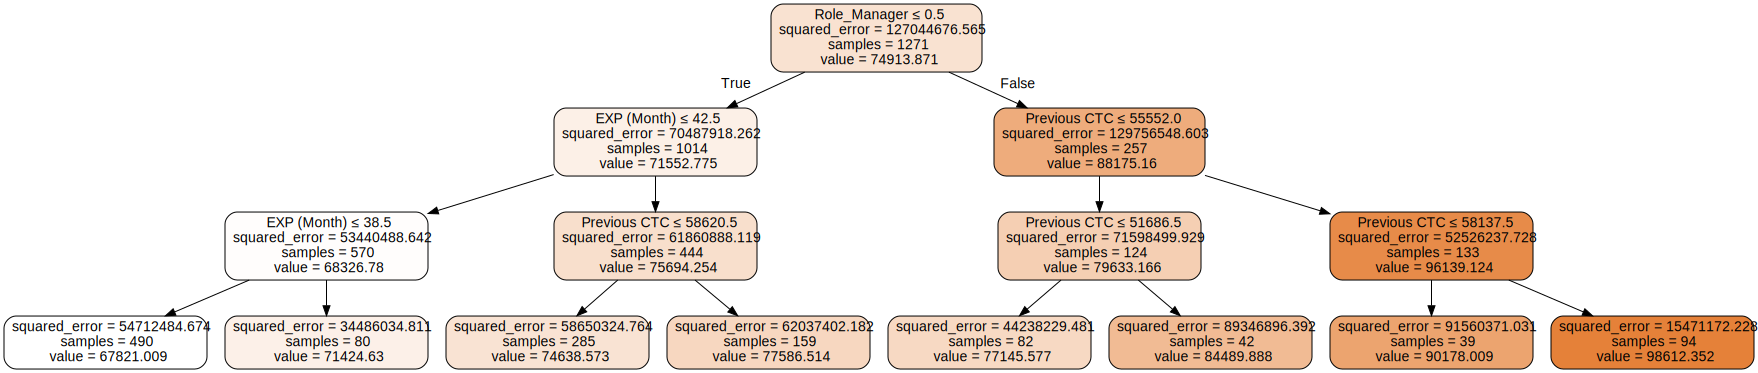

In [83]:
dot_data= export_graphviz(dregtree, out_file=None,
                           feature_names=x_train_r.columns,
                           filled=True, rounded=True,
                           special_characters=True)
dtree_graph = graphviz.Source(dot_data)

dtree_graph

**Optimal Decision Tree**

In [84]:
# importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [85]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [86]:
# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
# Perform Grid Search with Cross-Validation i.e(cv=5)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5,n_jobs=-1, scoring='r2')
grid_search.fit(x_train_r, y_train_r)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [87]:
# Get the best parameters
best_params = grid_search.best_params_

In [88]:
# Train the Decision Tree Regressor with the best parameters
best_dt_regressor = DecisionTreeRegressor(**best_params, random_state=42)
best_dt_regressor.fit(x_train_r, y_train_r)

DecisionTreeRegressor(max_depth=3, random_state=42)

checking the performance of the decision tree using optimal values

In [89]:
# Calculate R² and MSE for the test set
r2_best = r2_score(y_test_r, best_dt_regressor.predict(x_test_r))
mse_best = mean_squared_error(y_test_r, best_dt_regressor.predict(x_test_r))

# Print results
print("Best Parameters:", best_params)
print("R² of test set with best parameters:", r2_best)
print("mse of test set with best parameters",mse_best)

print("R² of train set with best parameters:", r2_score(y_train_r, best_dt_regressor.predict(x_train_r)))
print("mse of train set with best parameters",mean_squared_error(y_train_r, best_dt_regressor.predict(x_train_r)))

Best Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
R² of test set with best parameters: 0.58488635889887
mse of test set with best parameters 65097378.13584338
R² of train set with best parameters: 0.5754571593993215
mse of train set with best parameters 53935907.87193003


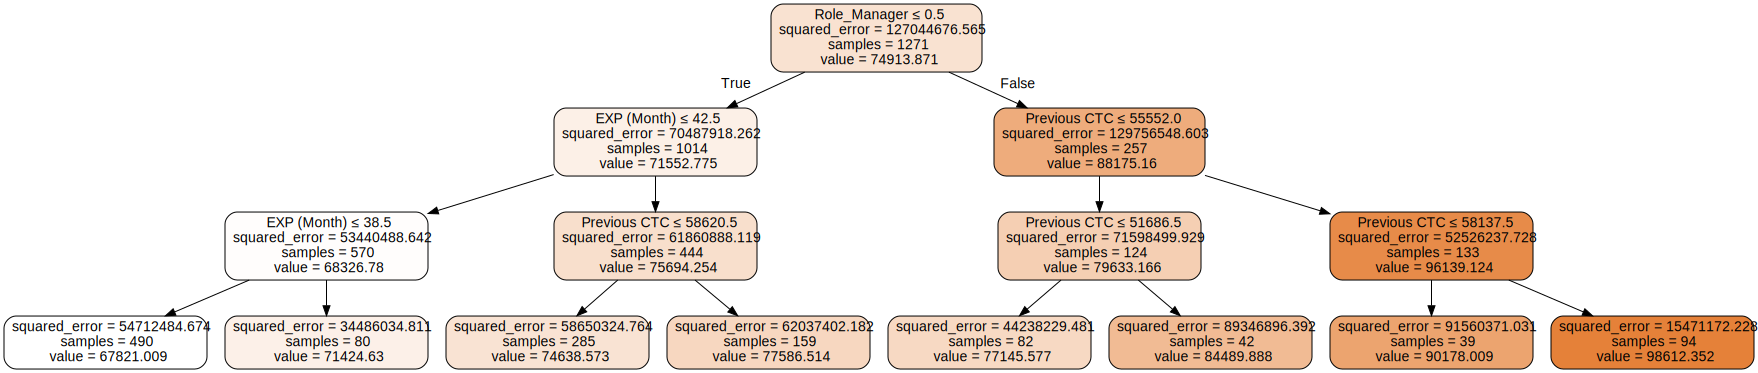

In [90]:
dot_data_best= export_graphviz(best_dt_regressor, out_file=None,
                           feature_names=x_train_r.columns,
                           filled=True, rounded=True,
                           special_characters=True)
tree_graph_best = graphviz.Source(dot_data_best)

tree_graph_best


**Using BaggingRegressor**

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
# Create the Bagging regressor with a Decision Tree as the base estimator
base_estimator = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=1000, random_state=42)

# Train the model
bagging_model.fit(x_train_r, y_train_r)

# Make predictions on the test set
#Y_pred = bagging_model.predict(x_test_r)

# Evaluate the model performance
mse = mean_squared_error(y_test_r, bagging_model.predict(x_test_r))
r2 = r2_score(y_test_r, bagging_model.predict(x_test_r))

print(f'R-squared test: {r2}')
print(f'Mean Squared Error test: {mse}')

print(f'R-squared train set: {r2_score(y_train_r, bagging_model.predict(x_train_r))}')
print(f'Mean Squared Error train: {mean_squared_error(y_train_r, bagging_model.predict(x_train_r))}')




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R-squared test: 0.630021326789934
Mean Squared Error test: 58019393.2636528
R-squared train set: 0.9464706133256122
Mean Squared Error train: 6800623.61674905


#####using bagging technique in the decision tree increses the performance compare to decision tree gridsearch technique

**Random Forest**

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
# Create the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=1000,n_jobs=-1, random_state=42)

# Train the model
rf_model.fit(x_train_r, y_train_r)

# Evaluate the model
mse_rf = mean_squared_error(y_test_r, rf_model.predict(x_test_r))
r2_rf = r2_score(y_test_r,rf_model.predict(x_test_r))

#printing the results
print("R-squared of test set",r2_score(y_test_r,rf_model.predict(x_test_r)))
print(f'Mean Squared Error: {mse_rf}')

print(f'R-squared of trainset : {r2_score(y_train_r,rf_model.predict(x_train_r))}')
print("Mean Squared Error",mean_squared_error(y_train_r, rf_model.predict(x_train_r)))

R-squared of test set 0.6301116782720131
Mean Squared Error: 58005224.5059641
R-squared of trainset : 0.9464821796347157
Mean Squared Error 6799154.178749939


improving the performance by the hypertuning using gridsearch

In [122]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,10, 30],
    'min_samples_split': [2,5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300
# Create the base model to tune
rfb = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search_rfb = GridSearchCV(estimator=rfb, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search_rfb.fit(x_train_r, y_train_r)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [97]:
# Extract the best estimator
best_rf = grid_search_rfb.best_estimator_

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

#evaluating the performance
mse_brfm = mean_squared_error(y_test_r, best_rf.predict(x_test_r))
r2_brfm = r2_score(y_test_r, best_rf.predict(x_test_r))

print(f'Best parameters found: {grid_search.best_params_}')
print(f'Mean Squared  Error for testset: {mse_brfm}')
print(f'R-squared for testset: {r2_brfm}')

print(f'Mean Squared Error for trainset: {mean_squared_error(y_train_r, best_rf.predict(x_train_r))}')
print(f'R-squared for trian set: {r2_score(y_train_r, best_rf.predict(x_train_r))}')


Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared  Error for testset: 57538293.76929572
R-squared for testset: 0.6330892070725735
Mean Squared Error for trainset: 6949029.295050443
R-squared for trian set: 0.9453024756096967


 after using gridsearch technique r2 square value is varing from 0.6301116782720131 to 0.6330892070725735 (little bit similar)

**AdaBoost**

In [98]:
from sklearn.ensemble import AdaBoostRegressor

In [99]:
# Define the AdaBoost model with the base estimator
# training the model
ada_rf = AdaBoostRegressor(random_state=42)
ada_rf.fit(x_train_r, y_train_r)

# eveluating the model
mse_arf = mean_squared_error(y_test_r, ada_rf.predict(x_test_r))
r2_arf = r2_score(y_test_r, ada_rf.predict(x_test_r))

#printing the results
print(f'Mean Squared Error for test set: {mse_arf}')
print(f'R-squared for testset: {r2_arf}')

print(f'Mean Squared Error for train set: {mean_squared_error(y_train_r, ada_rf.predict(x_train_r))}')
print(f'R-squared for train set: {r2_score(y_train_r, ada_rf.predict(x_train_r))}')


Mean Squared Error for test set: 68180780.37547612
R-squared for testset: 0.5652240872786162
Mean Squared Error for train set: 53495068.410028294
R-squared for train set: 0.578927115589714


**XG Boost**

In [102]:
import xgboost as xgb

In [105]:
#  Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                           learning_rate = 0.1,
                           max_depth = 5,
                           alpha = 10,
                           n_estimators = 100)

#  Train the model
xgb_reg.fit(x_train_r, y_train_r)

#  Make predictions
#y_pred = xgb_reg.predict(x_test_r)

#  Evaluate the model
mse_xb= mean_squared_error(y_test_r, xgb_reg.predict(x_test_r))
r2_xgb=r2_score(y_test_r, xgb_reg.predict(x_test_r))


print("Mean Squared Error of test set :", mse)
print("R: Squared Error of test set:", r2_xgb)

print("Mean Squared Error of train set :",mean_squared_error(y_train_r, xgb_reg.predict(x_train_r)))
print("R: Squared Error of train set:", r2_score(y_train_r, xgb_reg.predict(x_train_r)))


Mean Squared Error of test set : 67154695.66434321
R: Squared Error of test set: 0.5717672349861589
Mean Squared Error of train set : 37002834.816934764
R: Squared Error of train set: 0.708741555982322


**Gradient Boosting Regressor**

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [114]:
# Initialize the model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_regressor.fit(x_train_r, y_train_r)

# Make predictions
y_pred_test_gbr = gb_regressor.predict(x_test_r)
y_pred_train_gbr= gb_regressor.predict(x_train_r)


In [116]:
# Evaluate the model
mse_gbr = mean_squared_error(y_test_r, y_pred_test_gbr)
r2_gbr=r2_score(y_test_r, y_pred_test_gbr)

#printing the values
print("R-squared of test set",r2_gbr)
print("Mean Squared Error of test set:", mse_gbr)

print("R-squared of train set",r2_score(y_train_r, y_pred_train_gbr))
print("Mean Squared Error of train set:", mean_squared_error(y_train_r,y_pred_train_gbr))

R-squared of test set 0.6035753906433374
Mean Squared Error of test set: 62166597.631412804
R-squared of train set 0.6906305834368701
Mean Squared Error of train set: 39303737.46624207


comapring the results for choosing best model

In [4]:
import pandas as pd

# Data for each model
data = {
    "Model": [
        "Gradient Boosting",
        "XGBoost",
        "AdaBoost",
        "Random Forest",
        "Decision Tree",
        "Lasso",
        "Ridge",
        "Linear Regression"
    ],
    "Test R-squared": [
        0.6036,
        0.5718,
        0.5652,
        0.6331,
        0.6300,
        0.5790,
        0.5790,
        0.5790
    ],
    "Test MSE": [
        62166597.63,
        67154695.66,
        68180780.38,
        57538293.77,
        58019393.26,
        66014242.72,
        66017625.80,
        66013643.90
    ],
    "Train_R-squared": [
        0.6906,
        0.7087,
        0.5789,
        0.9453,
        0.9465,
        0.5027,
        0.5027,
        0.5027
    ],
    "Train_MSE": [
        39303737.47,
        37002834.82,
        53495068.41,
        6949029.30,
        6800623.62,
        63184933.76,
        63184934.63,
        63184933.09
    ]
}

# Create DataFrame
pdf = pd.DataFrame(data)
print(pdf)


               Model  Test R-squared     Test MSE  Train_R-squared  \
0  Gradient Boosting          0.6036  62166597.63           0.6906   
1            XGBoost          0.5718  67154695.66           0.7087   
2           AdaBoost          0.5652  68180780.38           0.5789   
3      Random Forest          0.6331  57538293.77           0.9453   
4      Decision Tree          0.6300  58019393.26           0.9465   
5              Lasso          0.5790  66014242.72           0.5027   
6              Ridge          0.5790  66017625.80           0.5027   
7  Linear Regression          0.5790  66013643.90           0.5027   

     Train_MSE  
0  39303737.47  
1  37002834.82  
2  53495068.41  
3   6949029.30  
4   6800623.62  
5  63184933.76  
6  63184934.63  
7  63184933.09  


**Your views about the problem statement?**


TechWorks Consulting is a consulting company.y that specializes in providing top-notch IT talent to a variety of businesses TechWorks Consulting considers is the market rate for the specific job and skill set The company takes multiple factors into account when determining an employee's salary,including the employee's experience, qualifications, and
performance.

metero stations are given the one sheet , Collages given the different sheet other sheet having all information about employee.

College,	City,Role,	Previous _CTC,Previous_job_change,Graduation_Marks,	EXP (Month),CTC are the columns in the sheet .

College(which collage employee had studied),city(employee stay in city),previous_ctc(before earned by employee),previous_job_change(how many jobs are changed),Graduation_Marks(Graduation_Marks of employeee),ecxp(experience of employee(in months),ctc( current salary).

here salary is need to predicted for new employee(i.e dependent variable ,its depend on all other variables y) all other variable consider as independent variable i.e x  

finding optimal and more  accuratly performed regression model (i.e give more accurate resultls)the company in determining the salary of newly hired employees using the given data.


**2. What will be your approach to solving this task?**

*   The goal  of this project is  to predict the salary of newly hired
    employees using given data.
*   college tier, city type, role, previous CTC, job changes, graduation
    marks, and experience columns are present in data which are key features for predicting the salary of new employee.
*   Load the datasets into google colab and stored into diffrent variables
    for further use.using pandas library
*   Convert college tier into numerical values (e.g., Tier1 = 1, Tier2 = 2, Tier3 = 3). and Convert city type into numerical values (metro = 1, non metro = 0).
*   finding the empty columns using discribe method(but here there is no empty colums)
*    check for missing values by using isnull() (in this data set there no null values)
*   finding the Outliers  and place the outlier values with mean of that column values
*   I had created the dummy variables for the 'Role' column.
*  Split the data into training and testing sets to evaluate the model's performance on unseen data in the ratio of 80:20.
*   applying the different  regression models such as Linear Regression,ridge regression,Lasso Regression,Decision Tree Regression, Random Forest Regression, and Gradient Boosting Regression,XGBoosting Regression.
*   Use Grid Search with cross-validation to find the best hyperparameters for the selected models
*  finally evaluate the model's performance using metrics like Mean Squared Error (MSE) and R-squared.

*   Finding the best model for this dataset(which is having more r2 value with low mse value

















**3. What were the available ML model options you had to perform this task?**

I had performing a regression task like predicting employee salaries, several machine learning models i.e Linear regression,Lasso regression,Ridge Regression, Decision tree, Random forest, XGBoost, Gradient Boost, AdaBoost.

**Reason for Choosen Below  models:**

**Linear Regression:**
Linear regression is relatively simple to understand and implement compared to more complex models like neural networks or random forests.

**Lasso regression:**
Lasso regression helps to prevent overfitting by large coefficients, which tends to reduce model complexity. This is especially useful when dealing with datasets with a large number of features compared to the number of samples, as it helps in reducing the risk of overfitting.

**Ridge regression:**
Ridge regression addresses this issue by adding a penalty term that shrinks the coefficients towards zero, effectively reducing the impact of multicollinearity. Ridge regression adds a penalty term to the regression coefficients, which helps to prevent overfitting .

**Decisiontree:**
decision trees can still overfit the training data, techniques like pruning, setting a maximum depth, or using ensemble methods.it provide clear insights into which features are important for making predictions.

**Random Forest:**
Random Forest generally provides high accuracy in predicting values. It's an ensemble method that builds multiple decision trees and averages their predictions

**AdaBoost:**AdaBoost tends to generalize well and is less prone to overfitting compared to some other algorithms

**XGBoost:** XGBoost provides several regularization techniques to prevent overfitting.




**4.Which model’s performance is best and what could be the possible reason for that?**

The **Random Forest** model is the best choice for given dataset

beacause  its performance on the test set. It has the highest R-squared value (0.6331) and the lowest MSE (57,538,293.77) on the test set, indicating it predicts the target variable most accurately compared to the other models.and performance  on the train set is mse  value is and r2 score value is 6949029.2950, 0.94530 respectivly

Random Forest creates multiple decision trees using different subsets of the training data performing bootstrapping Each decision tree is trained on a different bootstraping, which means each tree is likely to be trained on slightly different data. This helps in reducing the variance of the model other than models.


**5. What steps can you take to improve this selected model’s performance even further?**


To further improve the performance of the selected Random Forest model, using tuning hyperparameters,removig outliers

For I performed gridsearch on random forest model then the r2 score is incresed from 0.630111 to 0.633089

we can change various parameters explained detailly below

Number of Trees (n_estimators): Increasing the number of trees can improve performance.n_estimators':  in this model I train with these list of values[100, 200, 300],
    
Maximum Depth (max_depth): Controlling the maximum depth of the trees can prevent overfitting. here I take 'max_depth': [None,10, 30].

Minimum Samples Split (min_samples_split): Adjusting the minimum number of samples required to split an internal node can help control the complexity of the model. here i take 'min_samples_split': [2,5, 10].

Minimum Samples Leaf (min_samples_leaf): Setting a minimum number of samples for each leaf can prevent overfitting. here i take 'min_samples_leaf': [1, 2, 4]

Maximum Features (max_features): Varying the number of features to consider when looking for the best split can impact model performance.


the performace is little bit increased  Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}.